In [3]:
pip install lazypredict

In [4]:
import pandas as pd

df = pd.read_csv('cannula_data.csv')

print(df)


    Drawing  Bright Annealing  Sinking  Electro Fission  Distorted or Not
0     391.1              99.2    375.6            391.0                 1
1     384.7             102.6    387.3            390.7                 1
2     361.3             114.1    383.6            400.0                 1
3     393.8             117.1    402.4            406.9                 1
4     375.0             115.6    403.8            407.1                 1
5     395.1              98.9    411.8            402.0                 1
6     391.6             116.5    395.4            411.6                 1
7     392.6             115.0    396.8            396.0                 1
8     360.4             107.4    385.6            387.7                 1
9     387.4             115.2    390.1            407.9                 1
10    394.2             108.0    408.5            415.0                 1
11    383.8             106.6    387.7            394.1                 1
12    349.0             196.7    355.2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df.shape

(24, 5)

In [8]:
df.head()

,Drawing,Bright Annealing,Sinking,Electro Fission,Distorted or Not
0,391.1,99.2,375.6,391.0,1
1,384.7,102.6,387.3,390.7,1
2,361.3,114.1,383.6,400.0,1
3,393.8,117.1,402.4,406.9,1
4,375.0,115.6,403.8,407.1,1


In [9]:
print(df)

    Drawing  Bright Annealing  Sinking  Electro Fission  Distorted or Not
0     391.1              99.2    375.6            391.0                 1
1     384.7             102.6    387.3            390.7                 1
2     361.3             114.1    383.6            400.0                 1
3     393.8             117.1    402.4            406.9                 1
4     375.0             115.6    403.8            407.1                 1
5     395.1              98.9    411.8            402.0                 1
6     391.6             116.5    395.4            411.6                 1
7     392.6             115.0    396.8            396.0                 1
8     360.4             107.4    385.6            387.7                 1
9     387.4             115.2    390.1            407.9                 1
10    394.2             108.0    408.5            415.0                 1
11    383.8             106.6    387.7            394.1                 1
12    349.0             196.7    355.2

In [10]:
df['Distorted or Not'].value_counts()

,count
Distorted or Not,
1,12
0,12


In [11]:
df.isnull().sum()

,0
Drawing,0
Bright Annealing,0
Sinking,0
Electro Fission,0
Distorted or Not,0


In [13]:
X = df.drop(['Distorted or Not'], axis=1)

y = df['Distorted or Not']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
X_train.shape, X_test.shape

((16, 4), (8, 4))

In [16]:
X_train.dtypes

,0
Drawing,float64
Bright Annealing,float64
Sinking,float64
Electro Fission,float64


In [17]:
X_train.head()

,Drawing,Bright Annealing,Sinking,Electro Fission
21,398.4,163.8,392.6,413.8
5,395.1,98.9,411.8,402.0
2,361.3,114.1,383.6,400.0
12,349.0,196.7,355.2,363.4
15,371.2,174.2,362.4,366.3


In [18]:
X_test.head()

,Drawing,Bright Annealing,Sinking,Electro Fission
8,360.4,107.4,385.6,387.7
16,344.1,171.4,340.2,397.4
0,391.1,99.2,375.6,391.0
18,370.6,165.7,387.9,420.0
11,383.8,106.6,387.7,394.1


In [19]:
print(X_train.columns)

Index(['Drawing', 'Bright Annealing', 'Sinking', 'Electro Fission'], dtype='object')


In [20]:
X_train.head()

,Drawing,Bright Annealing,Sinking,Electro Fission
21,398.4,163.8,392.6,413.8
5,395.1,98.9,411.8,402.0
2,361.3,114.1,383.6,400.0
12,349.0,196.7,355.2,363.4
15,371.2,174.2,362.4,366.3


In [21]:
X_train.dtypes

,0
Drawing,float64
Bright Annealing,float64
Sinking,float64
Electro Fission,float64


In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Your Model have accuracy score of : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Your Model have accuracy score of : 1.0000


In [23]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)


print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 1.0000


In [24]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [25]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
Bright Annealing,0.645151
Electro Fission,0.126417
Drawing,0.119305
Sinking,0.109127


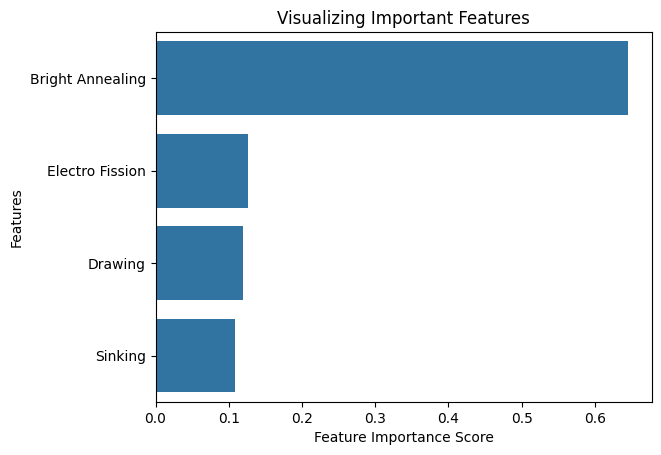

In [26]:
sns.barplot(x=feature_scores, y=feature_scores.index)




plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



plt.title("Visualizing Important Features")


plt.show()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision Score (for each class)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'micro', 'macro', or 'weighted' for multi-class
print(f"Precision: {precision:.4f}")

# Recall Score (for each class)
recall = recall_score(y_test, y_pred, average='macro')  # Use 'micro', 'macro', or 'weighted' for multi-class
print(f"Recall: {recall:.4f}")

# F1 Score (for each class)
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'micro', 'macro', or 'weighted' for multi-class
print(f"F1 Score: {f1:.4f}")

# Classification Report (includes precision, recall, F1 score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC AUC (only for binary classification tasks)
# You need probability scores for this metric, so you should use the predict_proba() method
# For binary classification:
if len(set(y_test)) == 2:  # Check if the problem is binary classification
    y_prob = rfc.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"\nROC AUC: {roc_auc:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


Confusion Matrix:
[[3 0]
 [0 5]]

ROC AUC: 1.0000


In [31]:
input_data = (394.7,112.7,403.4,410.8)

prediction = rfc.predict([input_data])

if prediction[0] == 0:
    print("The cannula is not distorted.")
else:
    print("The cannula is distorted.")

The cannula is distorted.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [32]:
import pickle

In [35]:
filename = 'saved_steps.pkl'
pickle.dump(rfc,open(filename,'wb'))